In [1]:
import scanpy as sc
import spatialdata_io
import spatialdata as sd
import pandas as pd
import squidpy as sq

In [2]:
adata2 = sc.read("/Users/olympia/Downloads/tbrucei_spatial.h5ad")

In [3]:
adata2

AnnData object with n_obs × n_vars = 13195 × 16851
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent.mt', 'percent.ribo', 'S.Score', 'G2M.Score', 'pANN_0.25_0.09_1466', 'nCount_SCT', 'nFeature_SCT', 'Broad_Cell_Types', 'Cell_Subclusters', 'Infection_Status', 'Cell_Cyle', 'Experimental_Groups', 'Seurat_Clusters', 'Biological_Replicates'
    var: 'features'
    uns: 'CellPhoneDB_Interactions', 'Cellchat_Interactions', 'spatial'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [5]:
adata2.write_zarr("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/tbrucei_sc.zarr")

In [11]:
naive = spatialdata_io.visium("/Users/olympia/Desktop/Juan_Tbrucei_Spatial/A1_naive/outs/", 
                               dataset_id="naive",
                               counts_file="filtered_feature_bc_matrix.h5",
                               fullres_image_file="spatial/tissue_lowres_image.png",
                               tissue_positions_file="spatial/tissue_positions_list.csv",
                               scalefactors_file="spatial/scalefactors_json.json")

INFO     reading /Users/olympia/Desktop/Juan_Tbrucei_Spatial/A1_naive/outs/filtered_feature_bc_matrix.h5           


/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/models/models.py:1053: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [59]:
naive

SpatialData object
├── Images
│     ├── 'naive_full_image': DataTree[cyx] (3, 600, 589), (3, 300, 294), (3, 150, 147), (3, 75, 73), (3, 37, 36)
│     ├── 'naive_hires_image': DataArray[cyx] (3, 2000, 1963)
│     └── 'naive_lowres_image': DataArray[cyx] (3, 600, 589)
├── Shapes
│     └── 'naive': GeoDataFrame shape: (3225, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3225, 42756)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        naive_hires_image (Images), naive (Shapes)
    ▸ 'downscaled_lowres', with elements:
        naive_lowres_image (Images), naive (Shapes)
    ▸ 'global', with elements:
        naive_full_image (Images), naive_hires_image (Images), naive_lowres_image (Images), naive (Shapes)

In [50]:
import spatialdata_plot

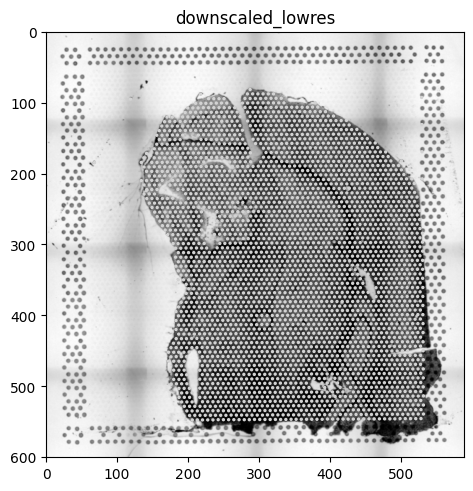

In [60]:
naive.pl.render_images().pl.render_shapes().pl.show("downscaled_lowres")

In [12]:
import pandas as pd
import numpy as np

In [13]:
naive_meta = pd.read_csv("/Users/olympia/Desktop/Juan_Tbrucei_Spatial/A1_naive_results/meta_data.csv", index_col=0)

In [14]:
naive_meta

,in_tissue,array_row,array_col,nr_feats,perc_feats,total_expr,mito,leiden_clus,brain_regions
cell_ID,,,,,,,,,
AAACACCAATAACTGC-1,1,59,19,5941,42.484268,4017.305037,1.71,7,Hippocampus
AAACAGAGCGACTCCT-1,1,14,94,6087,43.528318,4381.070840,1.48,1,Cerebral Cortex
AAACAGCTTTCAGAAG-1,1,43,9,6573,47.003719,4141.524718,1.61,2,Upper Cerebral Cortex
AAACAGGGTCTATATT-1,1,47,13,4076,29.147597,3551.631350,1.83,5,White Matter
AAACAGTGTTCCTGGG-1,1,73,43,6456,46.167048,4253.433011,1.54,4,Thalamus
...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,3392,24.256293,3610.761065,1.92,1,Cerebral Cortex
TTGTTTCACATCCAGG-1,1,58,42,4918,35.168764,4007.843785,1.70,4,Thalamus
TTGTTTCATTAGTCTA-1,1,60,30,5705,40.796625,4016.793765,1.67,7,Hippocampus


In [16]:
common_index = naive_meta.index.intersection(naive.tables["table"].obs.index)

In [17]:
naive.tables["table"] = naive.tables["table"][naive.tables["table"].obs_names.isin(common_index)].copy()

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [18]:
naive_decon = pd.read_csv("/Users/olympia/Desktop/Juan_Tbrucei_Spatial/A1_Naive_results/deconvolution.csv", index_col=0)

In [19]:
naive.tables["table"].uns['decon'] = naive_decon

In [20]:
naive.tables["table"].obs["brain_region"] = naive_meta["brain_regions"]

In [21]:
naive.tables["table"].obs['brain_region'] = naive.tables["table"].obs['brain_region'].astype('category')

In [22]:
sc.pp.normalize_total(naive.tables["table"], target_sum=1e4)
sc.pp.log1p(naive.tables["table"])

In [23]:
# Check that all shapes have a unique index
print(naive.shapes['naive'].index[:5])

# Check that all table obs indices overlap
print(naive.tables['table'].obs.index[:5])

Index([0, 1, 2, 3, 4], dtype='int64', name='spot_id')
Index(['AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1',
       'AAACAGGGTCTATATT-1', 'AAACAGTGTTCCTGGG-1'],
      dtype='object')


In [26]:
naive.tables['table'].obs.index = naive.tables['table'].obs['spot_id']

In [27]:
naive.shapes['naive'] = naive.shapes['naive'].loc[naive.tables['table'].obs.index]

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `naive` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [25]:
naive.tables["table"].obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, AAACACCAATAACTGC-1 to TTGTTTGTATTACACG-1
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   in_tissue     3068 non-null   int64   
 1   array_row     3068 non-null   int64   
 2   array_col     3068 non-null   int64   
 3   spot_id       3068 non-null   int64   
 4   region        3068 non-null   category
 5   brain_region  3068 non-null   category
dtypes: category(2), int64(4)
memory usage: 190.7+ KB


In [28]:
naive

SpatialData object
├── Images
│     ├── 'naive_full_image': DataTree[cyx] (3, 600, 589), (3, 300, 294), (3, 150, 147), (3, 75, 73), (3, 37, 36)
│     ├── 'naive_hires_image': DataArray[cyx] (3, 2000, 1963)
│     └── 'naive_lowres_image': DataArray[cyx] (3, 600, 589)
├── Shapes
│     └── 'naive': GeoDataFrame shape: (3068, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3068, 42756)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        naive_hires_image (Images), naive (Shapes)
    ▸ 'downscaled_lowres', with elements:
        naive_lowres_image (Images), naive (Shapes)
    ▸ 'global', with elements:
        naive_full_image (Images), naive_hires_image (Images), naive_lowres_image (Images), naive (Shapes)

In [29]:
naive.write("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr")

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr                            


In [65]:
naive = sd.read_zarr("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr")

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:

In [4]:
adata2.uns['liana_annotated'] = adata2.uns["Cellchat_Interactions"]

In [43]:
adata2.uns['liana_annotated']

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence,Interacting_Pair,Pair_Gene,Condition
1,Endothelial,Pericytes/ Tanycytes,Pdgfb,Pdgfrb,0.008630,0.00,PDGFB_PDGFRB,Pdgfb - Pdgfrb,PDGF,Secreted Signaling,PMID: 15207812,Endothelial-Pericytes/ Tanycytes,- PDGFB_PDGFRB,Infected
2,Microglia 3,Endothelial,Vegfa,Flt1,0.033268,0.00,VEGFA_VEGFR1,Vegfa - Vegfr1,VEGF,Secreted Signaling,KEGG: mmu04370; PMID: 16633338,Microglia 3-Endothelial,- VEGFA_VEGFR1,Infected
3,Microglia 1,Microglia 3,Ccl4,Ccr5,0.006592,0.00,CCL4_CCR5,Ccl4 - Ccr5,CCL,Secreted Signaling,KEGG: mmu04060,Microglia 1-Microglia 3,- CCL4_CCR5,Infected
4,Microglia 2,Microglia 3,Ccl4,Ccr5,0.037040,0.00,CCL4_CCR5,Ccl4 - Ccr5,CCL,Secreted Signaling,KEGG: mmu04060,Microglia 2-Microglia 3,- CCL4_CCR5,Infected
6,Microglia 4,Microglia 3,Ccl4,Ccr5,0.004966,0.00,CCL4_CCR5,Ccl4 - Ccr5,CCL,Secreted Signaling,KEGG: mmu04060,Microglia 4-Microglia 3,- CCL4_CCR5,Infected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Microglia 1,Microglia 4,Psap,Gpr37l1,0.018059,0.00,PSAP_GPR37L1,Psap - Gpr37l1,PSAP,Secreted Signaling,PMID: 23690594,Microglia 1-Microglia 4,- PSAP_GPR37L1,Uninfected
461,Microglia 2,Microglia 4,Psap,Gpr37l1,0.017640,0.01,PSAP_GPR37L1,Psap - Gpr37l1,PSAP,Secreted Signaling,PMID: 23690594,Microglia 2-Microglia 4,- PSAP_GPR37L1,Uninfected
471,Microglia 3,Microglia 4,Psap,Gpr37l1,0.017259,0.03,PSAP_GPR37L1,Psap - Gpr37l1,PSAP,Secreted Signaling,PMID: 23690594,Microglia 3-Microglia 4,- PSAP_GPR37L1,Uninfected
481,Endothelial,Microglia 3,App,Cd74,0.018610,0.00,APP_CD74,App - Cd74,APP,Cell-Cell Contact,PMID: 19849849,Endothelial-Microglia 3,- APP_CD74,Uninfected


In [84]:
adata_subset

AnnData object with n_obs × n_vars = 3068 × 42756
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'brain_region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs', 'decon', 'liana_annotated'
    obsm: 'spatial'

In [24]:
def replace_table(sdata):
    # copy the table to a backup table
    sdata["backup_table"] = sdata["table"]
    sdata.write_element("backup_table")

    # rewrite the original one
    sdata.delete_element_from_disk("table")
    sdata.write_element("table")

    # remove the backup copy
    sdata.delete_element_from_disk("backup_table")
    del sdata.tables["backup_table"]

In [96]:
adata_subset

AnnData object with n_obs × n_vars = 3068 × 42756
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'brain_region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs', 'decon', 'liana_annotated'
    obsm: 'spatial'

In [97]:
adata_subset.var_names_make_unique()

In [101]:
adata_subset.obs['brain_region'].info()

<class 'pandas.core.series.Series'>
Index: 3068 entries, AAACACCAATAACTGC-1 to TTGTTTGTATTACACG-1
Series name: brain_region
Non-Null Count  Dtype   
--------------  -----   
3068 non-null   category
dtypes: category(1)
memory usage: 91.9+ KB


In [102]:
naive["table"] = adata_subset

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [103]:
replace_table(naive)

In [104]:
naive


SpatialData object, with associated Zarr store: /Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr
├── Images
│     ├── 'naive_full_image': DataTree[cyx] (3, 600, 589), (3, 300, 294), (3, 150, 147), (3, 75, 73), (3, 37, 36)
│     ├── 'naive_hires_image': DataArray[cyx] (3, 2000, 1963)
│     └── 'naive_lowres_image': DataArray[cyx] (3, 600, 589)
├── Shapes
│     └── 'naive': GeoDataFrame shape: (3225, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3068, 42756)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        naive_hires_image (Images), naive (Shapes)
    ▸ 'downscaled_lowres', with elements:
        naive_lowres_image (Images), naive (Shapes)
    ▸ 'global', with elements:
        naive_full_image (Images), naive_hires_image (Images), naive_lowres_image (Images), naive (Shapes)

In [112]:
# Check that all shapes have a unique index
print(naive.shapes['naive'].index[:5])

# Check that all table obs indices overlap
print(naive.tables['table'].obs.index[:5])

Index([0, 1, 2, 3, 4], dtype='int64', name='spot_id')
Index(['AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1',
       'AAACAGGGTCTATATT-1', 'AAACAGTGTTCCTGGG-1'],
      dtype='object')


In [115]:
naive.tables['table'].obs.index = naive.tables['table'].obs['spot_id']


In [116]:
naive.tables['table'].obs

,in_tissue,array_row,array_col,spot_id,region,brain_region
spot_id,,,,,,
0,1,59,19,0,naive,Hippocampus
1,1,14,94,1,naive,Cerebral Cortex
2,1,43,9,2,naive,Upper Cerebral Cortex
3,1,47,13,3,naive,White Matter
4,1,73,43,4,naive,Thalamus
...,...,...,...,...,...,...
3220,1,31,77,3220,naive,Cerebral Cortex
3221,1,58,42,3221,naive,Thalamus
3222,1,60,30,3222,naive,Hippocampus


In [117]:
replace_table(naive)


In [1]:
from vitessce import (VitessceConfig, 
                      AnnDataWrapper, 
                      SpatialDataWrapper,
                      Component as cm, 
                      get_initial_coordination_scope_prefix, 
                      CoordinationLevel as CL, 
                      ImageOmeZarrWrapper,
                      CoordinationType as ct,
                      ViewType as vt,
                      CsvWrapper,
                      DataType as dt
)

In [130]:
print(naive.tables['table'].obs.index)
print(naive.shapes['naive'].index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224],
      dtype='int64', name='spot_id', length=3068)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224],
      dtype='int64', name='spot_id', length=3068)


In [129]:
naive.shapes['naive'] = naive.shapes['naive'].loc[naive.tables['table'].obs.index]

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `naive` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [131]:
naive.write("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial_brucei.zarr", overwrite=True)


In [30]:
vc = VitessceConfig(
            schema_version="1.0.17",
            name="Breast Cancer Multi-Modal",
            description="something",
            base_dir="/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/",
        )

        # Single-Cell Dataset (scRNA-seq)
sc_dataset = vc.add_dataset(name="Single-Cell RNA").add_object(
            AnnDataWrapper(
                adata_path="tbrucei_sc.zarr",
                obs_feature_matrix_path="X",
                obs_embedding_paths=["obsm/X_umap"],
                obs_embedding_names=["UMAP"],
                obs_set_paths=["obs/Cell_Subclusters", "obs/Infection_Status"],
                obs_set_names=["Cell Type", "Infection Status"],
                coordination_values={
                    "obsType": "cell",
                    "obsSetSelection": "obsSetSelectionScope",
                },
            )
        )

        # Xenium Spatial Dataset
xenium_dataset = vc.add_dataset(name="Xenium Spatial").add_object(
            SpatialDataWrapper(
                sdata_path="naive_spatial.zarr",  # Path to Xenium dataset
                image_path="images/naive_lowres_image",  # Adjust this based on your Zarr file structure
                obs_feature_matrix_path="tables/table/X",  # Adjust this based on Xenium data
                obs_set_paths=[
                    "tables/table/obs/brain_region"
                ],  # Cluster annotations
                obs_set_names=["Clusters"],
                obs_spots_path="shapes/naive",
                coordination_values={
                    "obsType": "spot",
                    "obsSetSelection": "obsSetSelectionScope",
                },
            )
        )

spatial_view = vc.add_view(
            "spatialBeta", dataset=xenium_dataset, x=0.0, y=6.0, w=6.0, h=6.0
        )
lc_view = vc.add_view(
            "layerControllerBeta", dataset=xenium_dataset, x=6.0, y=6.0, w=3.0, h=3.0
        )
feature_list_spatial = vc.add_view(
            "featureList", dataset=xenium_dataset, x=9.0, y=6.0, w=3.0, h=3.0
        )
xenium_obs_sets = vc.add_view(
            cm.OBS_SETS, dataset=xenium_dataset, x=6.0, y=3.0, w=3.0, h=3.0
        )

        # layer_controller = vc.add_view("layerControllerBeta", dataset=xenium_dataset)
vc.link_views_by_dict(
            [spatial_view, lc_view],
            {
                "imageLayer": CL(
                    [
                        {
                            "photometricInterpretation": "RGB",
                        }
                    ]
                )
            },
            scope_prefix=get_initial_coordination_scope_prefix("B", "image"),
        )

        # Views for Single-Cell Data
scatterplot = vc.add_view(
            cm.SCATTERPLOT,
            dataset=sc_dataset,
            mapping="UMAP",
            x=0.0,
            y=0.0,
            w=6.0,
            h=6.0,
        )
cell_sets = vc.add_view(
            cm.OBS_SETS, dataset=sc_dataset, x=6.0, y=0.0, w=3.0, h=4.0
        )
feature_list = vc.add_view(
            cm.FEATURE_LIST, dataset=sc_dataset, x=9.0, y=0.0, w=3.0, h=4.0
        )

description = vc.add_view(
            cm.DESCRIPTION, dataset=xenium_dataset, x=9.0, y=6.0, w=3.0, h=3.0
        )

        # Link views appropriately
vc.link_views(
            [scatterplot, spatial_view, feature_list, cell_sets],
            ["obsType", "obsSetSelection"],
            ["cell", []],
        )
vc.link_views(
            [spatial_view, xenium_obs_sets, feature_list_spatial, lc_view],
            ["obsType", "obsSetSelection"],
            ["spot", []],
        )

vw = vc.widget()
vw

VitessceWidget(config={'version': '1.0.17', 'name': 'Breast Cancer Multi-Modal', 'description': 'something', '…

In [7]:
import zarr

import zarr
z = zarr.open("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial_brucei.zarr", mode="r")
print(z.tree())

print(z["tables"]["table"]["obs"]["brain_region"].keys())

/
 ├── images
 │   ├── naive_full_image
 │   │   ├── 0 (3, 600, 589) uint8
 │   │   ├── 1 (3, 300, 294) uint8
 │   │   ├── 2 (3, 150, 147) uint8
 │   │   ├── 3 (3, 75, 73) uint8
 │   │   └── 4 (3, 37, 36) uint8
 │   ├── naive_hires_image
 │   │   └── 0 (3, 2000, 1963) uint8
 │   └── naive_lowres_image
 │       └── 0 (3, 600, 589) uint8
 ├── shapes
 │   └── naive
 └── tables
     └── table
         ├── X
         │   ├── data (14387538,) float32
         │   ├── indices (14387538,) int32
         │   └── indptr (3069,) int32
         ├── layers
         ├── obs
         │   ├── array_col (3068,) int64
         │   ├── array_row (3068,) int64
         │   ├── brain_region
         │   │   ├── categories (7,) object
         │   │   └── codes (3068,) int8
         │   ├── in_tissue (3068,) int64
         │   ├── region
         │   │   ├── categories (1,) object
         │   │   └── codes (3068,) int8
         │   └── spot_id (3068,) int64
         ├── obsm
         │   └── spatial (3068,

In [8]:
# Coerce table index to string version of spot_id
naive.tables['table'].obs.index = naive.tables['table'].obs['spot_id'].astype(str)

# Remove old column
naive.tables['table'].obs.drop(columns=["spot_id"], inplace=True)

# Align shapes to table index
naive.shapes['naive'] = naive.shapes['naive'].loc[naive.tables['table'].obs.index]

# Rewrite to Zarr
naive.write_zarr("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial_brucei.zarr", overwrite=True)

NameError: name 'naive' is not defined

In [138]:
naive.shapes['naive'].index.equals(naive.tables['table'].obs.index)

True

In [ ]:
sdata.tables['table'].obs['brain_region'] = sdata.tables['table'].obs['brain_region'].astype("category")
sdata.write_zarr("naive_spatial_brucei.zarr", overwrite=True)

In [140]:
naive.tables['table'].obs['brain_region']

spot_id
0                 Hippocampus
1             Cerebral Cortex
2       Upper Cerebral Cortex
3                White Matter
4                    Thalamus
                ...          
3220          Cerebral Cortex
3221                 Thalamus
3222              Hippocampus
3223             White Matter
3224                 Thalamus
Name: brain_region, Length: 3068, dtype: category
Categories (7, object): ['Basal Ganglia', 'Cerebral Cortex', 'Hippocampus', 'Hypothalamus', 'Thalamus', 'Upper Cerebral Cortex', 'White Matter']

In [141]:
replace_table(naive)

In [47]:
naive = sd.read_zarr("/Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr")


/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/zarr/creation.py:

In [29]:
naive

SpatialData object, with associated Zarr store: /Users/olympia/Documents/cellXplore/cellXplore_App/datasets/naive_spatial.zarr
├── Images
│     ├── 'naive_full_image': DataTree[cyx] (3, 600, 589), (3, 300, 294), (3, 150, 147), (3, 75, 73), (3, 37, 36)
│     ├── 'naive_hires_image': DataArray[cyx] (3, 2000, 1963)
│     └── 'naive_lowres_image': DataArray[cyx] (3, 600, 589)
├── Shapes
│     └── 'naive': GeoDataFrame shape: (3068, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3068, 42756)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        naive_hires_image (Images), naive (Shapes)
    ▸ 'downscaled_lowres', with elements:
        naive_lowres_image (Images), naive (Shapes)
    ▸ 'global', with elements:
        naive_full_image (Images), naive_hires_image (Images), naive_lowres_image (Images), naive (Shapes)

In [9]:
naive_adata = naive.tables['table']

In [10]:
naive_adata

AnnData object with n_obs × n_vars = 3068 × 42756
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'brain_region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'decon', 'log1p', 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [30]:
naive.tables['table'].uns['decon'].index = naive_adata.obs.index

In [31]:
naive.tables['table'].uns['decon']

,Pericytes/ Tanycytes,Astrocyte 1,Microglia 2,Endothelial,Microglia 1,B cells/ Oligo,Astrocyte 2,T cells,Microglia 3,Ependymocytes,Microglia 4
spot_id,,,,,,,,,,,
0,0.000000,0.146252,0.0,0.000000e+00,0.000000,0.853748,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00
1,0.000000,0.000000,0.0,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00
2,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.638530,0.000000,0.000000,0.0,0.000000e+00,3.614700e-01
3,0.000000,0.000000,0.0,1.821683e-02,0.000000,0.000000,0.981783,0.000000,0.0,-1.234829e-19,1.561786e-18
4,0.000000,0.000000,0.0,5.165934e-02,0.000000,0.942010,0.006330,0.000000,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
3220,0.000000,0.000000,0.0,1.753086e-19,0.000000,0.645255,0.000000,0.148741,0.0,1.077241e-02,1.952308e-01
3221,0.000157,0.000000,0.0,0.000000e+00,0.000000,0.005765,0.994078,0.000000,0.0,0.000000e+00,0.000000e+00
3222,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.257910,0.000000,0.639322,0.0,0.000000e+00,1.027679e-01


In [32]:
naive.tables['table'].obs['cell_type'] = naive.tables['table'].uns['decon'].idxmax(axis=1)

In [34]:
naive.tables['table'].obs


,in_tissue,array_row,array_col,spot_id,region,brain_region,cell_type
spot_id,,,,,,,
0,1,59,19,0,naive,Hippocampus,B cells/ Oligo
1,1,14,94,1,naive,Cerebral Cortex,B cells/ Oligo
2,1,43,9,2,naive,Upper Cerebral Cortex,B cells/ Oligo
3,1,47,13,3,naive,White Matter,Astrocyte 2
4,1,73,43,4,naive,Thalamus,B cells/ Oligo
...,...,...,...,...,...,...,...
3220,1,31,77,3220,naive,Cerebral Cortex,B cells/ Oligo
3221,1,58,42,3221,naive,Thalamus,Astrocyte 2
3222,1,60,30,3222,naive,Hippocampus,T cells


In [22]:
naive.tables['table'] = naive_adata

/Users/olympia/mambaforge/envs/cellXplore_App_env/lib/python3.10/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [36]:
naive.tables['table'].obs.index.name = None

In [41]:
naive.tables['table'].obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 0 to 3224
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   in_tissue     3068 non-null   int64   
 1   array_row     3068 non-null   int64   
 2   array_col     3068 non-null   int64   
 3   spot_id       3068 non-null   int64   
 4   region        3068 non-null   category
 5   brain_region  3068 non-null   category
 6   cell_type     3068 non-null   category
dtypes: category(3), int64(4)
memory usage: 194.2+ KB


In [40]:
naive.tables["table"].obs['cell_type'] = naive.tables["table"].obs['cell_type'].astype('category')

In [42]:
replace_table(naive)


In [48]:
print(naive.tables["table"].obs.columns)

Index(['in_tissue', 'array_row', 'array_col', 'spot_id', 'region',
       'brain_region', 'cell_type'],
      dtype='object')


In [49]:
print(naive.tables["table"].obs["brain_region"].dtype)

category


In [50]:
print("Is categorical:", pd.api.types.is_categorical_dtype(naive.tables["table"].obs["brain_region"]))

Is categorical: True


/var/folders/3g/ww44c_q56sqdw2z04zls2mq00000gn/T/ipykernel_64376/618324499.py:1: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  print("Is categorical:", pd.api.types.is_categorical_dtype(naive.tables["table"].obs["brain_region"]))


In [51]:
naive.tables["table"].obs["brain_region"].isna().sum()

0